# Inverted Pendulum

Consider an inverted pendulum, consisteing of a point mass $m$ at the end of a light rod of length $\ell$. An oscillating force $a\cos\omega t$ is applied vertically to the other end of the rod. It may be shownn that the Lagrangian for this system is

$$L=\tfrac{1}{2}m(\ell^2\dot{\theta}^2+\omega^2a^2\sin^2\omega t+2\Omega a\ell\sin\omega t\sin\theta\dot{\theta})-mg(a\cos\omega t+\ell\cos\theta)$$

and hence Lagrange's equation of motion gives

$$\ell^2\ddot{\theta}+\omega^2a\ell\cos\omega t\sin\theta~-g\ell\sin\theta=0~~~.$$

There are a number of ways to proceed from here. Let's start by numerically integrating the equation of motion.

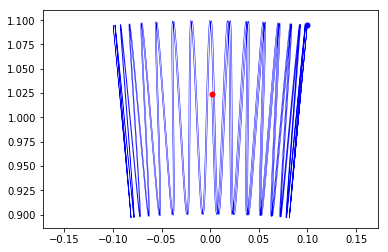

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

ell=1.0
omega=50
a=0.1
g=10
time=5

def dxdt(x,t):
    theta,dot_theta=x
    dtheta_dt=dot_theta
    d2theta_dt2=(g/ell)*np.sin(theta)-(omega**2*a/ell)*np.cos(omega*t)*np.sin(theta)
    return dtheta_dt, d2theta_dt2

x_0=[0.1,0]
t=np.linspace(0,time,num=1000)
theta,dot_theta=odeint(dxdt,x_0,t).T

x=ell*np.sin(theta)
y=a*np.cos(omega*t)+ell*np.cos(theta)

plt.figure(1)
plt.plot(x,y,lw=0.5,color='b')
plt.plot(x[0],y[0],ms=5,color='b',marker='o')
plt.plot(x[-1],y[-1],ms=5,color='r',marker='o')
plt.axis('equal')
plt.show()

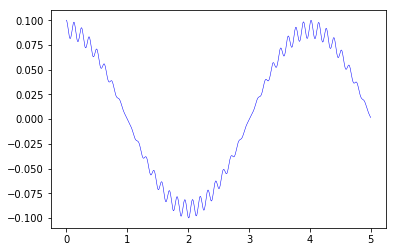

In [55]:
plt.figure(2)
plt.plot(t,theta,lw=0.5,color='b')
plt.show()

As a way of approximately solving this equation of motion, we shall use the following ansatz

$$\theta(t)=\theta_1+C\cos\omega t+S\sin\omega t$$

where is assumed that $\theta_1$, $C$ and $S$ are slowly-varying quantities. It can be shown that the equation of motion reduces to the sum of 'fast' $\sin\omega t$ and $\cos\omega t$ terms plus a slow term. From this, one obtains

$$\ell^2\ddot{\theta}_1=\tfrac{1}{2}g\ell\sin\theta_1\bigg(2-\frac{\omega^4a^2\ell^2\cos\theta_1}{\omega^2\ell^2+g\ell\cos\theta_1}\bigg)$$

and that oscillations of $\theta_1(t)$ about an equilbrium value $\theta_1=0$ are only possible if

$$\omega^2>\frac{2g\ell}{a^2}~~~.$$

In other words, if the frequency of the oscillating force is high enough, the inverted pendulum remains upright!